# Discovering Correlated Pattern in Big Data Using CoMine Algorithm

***

## Basic approach: Executing CoMine on a single dataset at a particular minimum support and minimum all-confidence

#### Step 0 : Install latest version of PAMI library

In [2]:
!pip install -U PAMI

#### Step 1: Import the CoMine algorithm

In [3]:
from PAMI.correlatedPattern.basic import CoMine  as alg

#### Step 2: Specify the following input parameters

In [5]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
minAllConfCount=0.1
minimumSupportCount=100  #Users can also specify this constraint between 0 to 1.

seperator='\t'       

#### Step 3: Execute the CoMine algorithm

In [6]:
obj = alg.CoMine(iFile=inputFile, minSup=minimumSupportCount,  minAllConf=minAllConfCount ,sep=seperator)   #initialize
obj.startMine()            #Start the mining process

Correlated patterns were generated successfully using CoMine algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [7]:
obj.save(outFile='correlatedPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [8]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [9]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 5761


##### Step 5.2: Runtime consumed by the mining algorithm

In [10]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 9.032797813415527


##### Step 5.3: Total Memory consumed by the mining algorithm

In [11]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 377995264
Memory (USS): 360579072


***

# Advanced Tutorial on Implementing CoMine Algorithm

#### In this tutorial, we explain how the CoMine algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the CoMine algorithm and pandas data frame

In [20]:
from PAMI.correlatedPattern.basic import CoMine  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [14]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv'
seperator='\t'
minAllConfCount=0.1
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup',"minAllConf" , 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of CoMine algorithm

#### Step 3: Execute the CoMine algorithm using a for loop

In [15]:
algorithm = 'CoMine'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.CoMine(inputFile, minSup=minSupCount,minAllConf=minAllConfCount , sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,minAllConfCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Correlated patterns were generated successfully using CoMine algorithm
Correlated patterns were generated successfully using CoMine algorithm
Correlated patterns were generated successfully using CoMine algorithm
Correlated patterns were generated successfully using CoMine algorithm
Correlated patterns were generated successfully using CoMine algorithm


In [16]:
print(result)

  algorithm  minSup  minAllConf  patterns   runtime     memory
0    CoMine     100         0.1      5761  9.142629  387956736
1    CoMine     150         0.1      5413  9.241332  380436480
2    CoMine     200         0.1      4819  8.759157  411090944
3    CoMine     250         0.1      3939  8.793078  407191552
4    CoMine     300         0.1      2951  8.719781  416727040


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [17]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

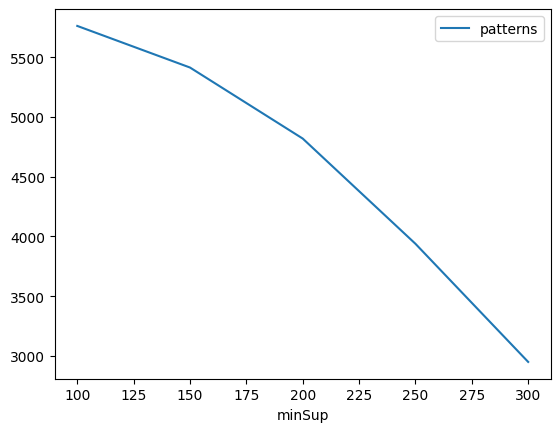

Graph for No Of Patterns is successfully generated!


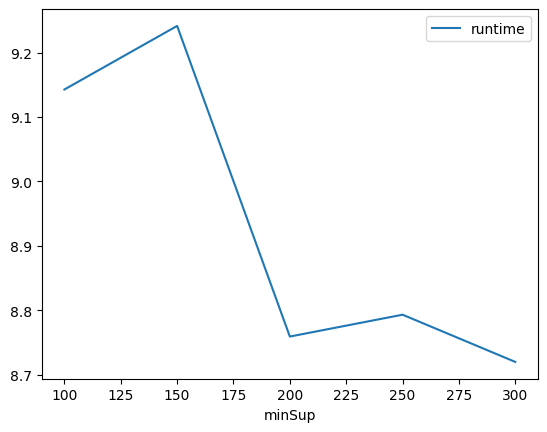

Graph for Runtime taken is successfully generated!


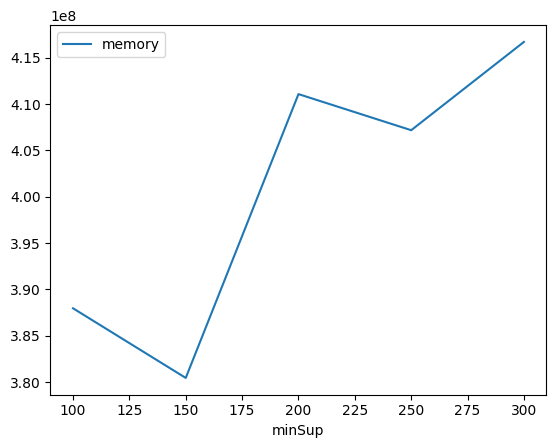

Graph for memory consumption is successfully generated!


In [18]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [19]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
